In [100]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [101]:
import numpy as np
import pandas as pd

In [102]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [103]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [104]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [105]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

# reflect the tables

In [106]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [107]:
# Save references to each table
stations = Base.classes.station
measurements = Base.classes.measurement

In [108]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [109]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')


In [110]:
for c in columns:
    print(c["name"], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Climate Analysis

TypeError: unsupported operand type(s) for -: 'str' and 'int'

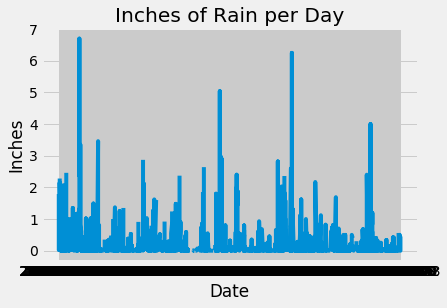

In [172]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
engine.execute('SELECT date, prcp FROM measurement').fetchall()
# Calculate the date 1 year ago from the last data point in the database
latest_date = session.query(measurements.date).order_by(measurements.date.desc()).first()
year_agos=dt.datetime.strptime(latest_date[0],"%Y-%m-%d")-dt.timedelta(days=365)

# last_date ='2017-08-23'
# year_ago ='2016-08-23'                    
# Perform a query to retrieve the data and precipitation scores
date_per = session.query(measurements.date, measurements.prcp).filter(measurements.date>= year_ago)
# # # Save the query results as a Pandas DataFrame and set the index to the date column
date_per
percip_df = pd.DataFrame(date_per)
date_df= percip_df.set_index(['date'])

# Sort the dataframe by date
sorted_df=date_df.sort_index()
# Use Pandas Plotting with Matplotlib to plot the data
ax = plt.plot(sorted_df.index,sorted_df['prcp'])
plt.plot(x_compat=True)
plt.title('Inches of Rain per Day')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(np.arange(sorted_df.index))
plt.show()

In [48]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sorted_df['prcp'].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

In [69]:
# Design a query to show how many stations are available in this dataset?
engine.execute('SELECT station FROM measurement')
stationcount=session.query(measurements.station)
counter_df=pd.DataFrame(stationcount)
counting=counter_df['station'].value_counts()

In [77]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
counted_df=pd.DataFrame(counting)
counted_df
station_values=counter_df['station'].value_counts()
counted_df.sort_values(['station'], ascending=False)
# counter_df

,station
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [81]:
first=counted_df.iloc[0]
first

station    2772
Name: USC00519281, dtype: int64

In [161]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
engine.execute("SELECT * FROM measurement WHERE station == 'USC00519281'")
results=session.query(func.min(measurements.tobs), func.avg(measurements.tobs), func.max(measurements.tobs)).filter(measurements.date >= year_ago).all()
temp_df = pd.DataFrame(results, columns = ["Min", "Average", "Max"])
temp_df
#returnvalue = {}
# returnvalue['maximum'] = results([2])
# returnvalue['minimum'] = results([0])
# returnvalue['average'] = results([1])
# print(returnvalue)
# temp_df.mean()
# temp_df.max()
# temp_df.min()

,Min,Average,Max
0,58.0,74.590583,87.0


In [95]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
engine.execute("SELECT * FROM measurement WHERE station == 'USC00519281'")
temperature=session.query(measurements.tobs).filter(measurements.date>= year_ago)
temps_df= pd.DataFrame(temperature)
temps_df


,tobs
0,81.0
1,79.0
2,80.0
3,79.0
4,77.0
...,...
2225,71.0
2226,78.0
2227,76.0
2228,76.0


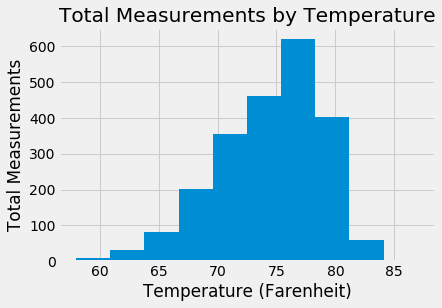

In [138]:
plt.hist(temps_df['tobs'])
plt.title("Total Measurements by Temperature")
plt.ylabel('Total Measurements')
plt.xlabel('Temperature (Farenheit)')
plt.show()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
